In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

# 1. Base de dados com contações após 1, 2, 3, 4 e 5 anos

In [2]:
df = pd.read_csv('Datasets/transformation_disc_result_SD.csv')

In [3]:
df = shuffle(df)

In [4]:
x = df.drop('Open_dif_disc', axis=1)
y = df['Open_dif_disc']

## 1. Seleção dos atributos mais significativos (no mínimo 5)

In [5]:
rfecv = RFECV(DecisionTreeClassifier(), min_features_to_select=5, cv=5)

In [6]:
x_r = rfecv.fit_transform(x,y)

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


## 2. Novamente a execução do treinamento com árvore de decisão
Após a execução, uma visualização gráfica da árvore é gerada.

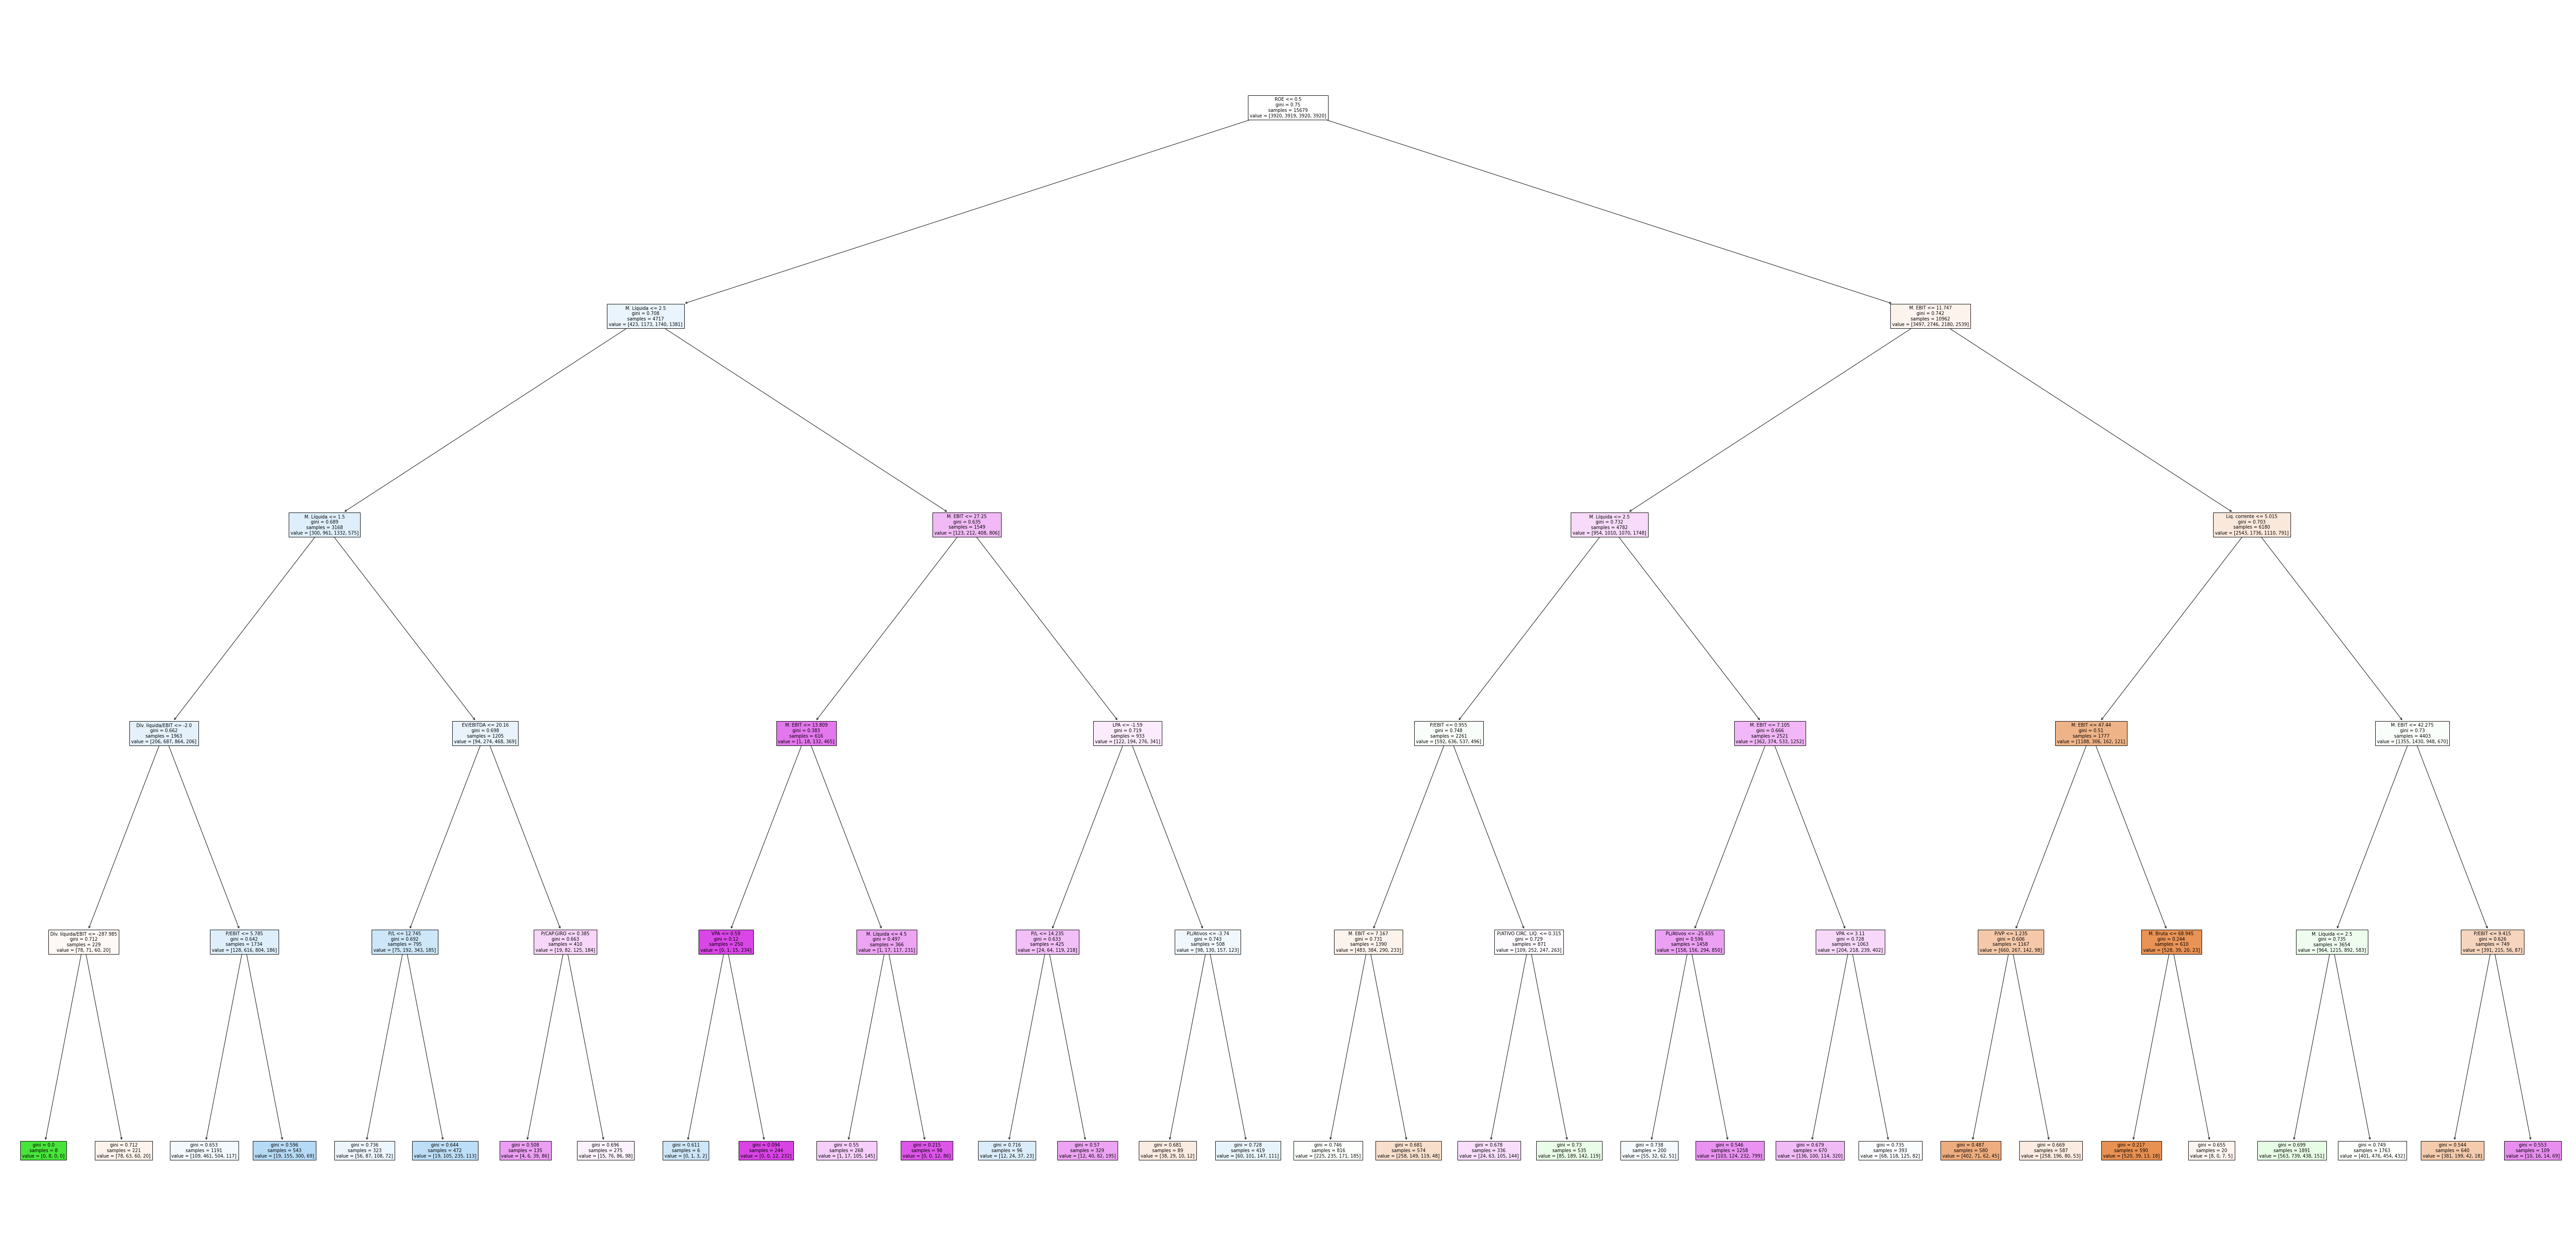

In [7]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_r,y)

fig = plt.figure(figsize=(100,50))
_ = plot_tree(tree, 
                   feature_names=x.columns,  
                   filled=True)
plt.savefig("Trees\\tree.jpeg", bbox_inches='tight')

## 3. Aplicação de Random Forest com validação cruzada

In [8]:
cv_result = cross_validate(RandomForestClassifier(), x, y, scoring='accuracy', cv=5)

In [9]:
cv_result

{'fit_time': array([3.67503762, 3.37399817, 3.70199704, 3.39598417, 3.34499741]),
 'score_time': array([0.08501172, 0.08200121, 0.08603644, 0.10897303, 0.08502913]),
 'test_score': array([0.78443878, 0.78380102, 0.77774235, 0.78252551, 0.78245614])}

## 4. Execução individual com Random Forest

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
tree = RandomForestClassifier()

In [12]:
tree.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
y_pred = tree.predict(x_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1192
         1.0       0.66      0.70      0.68      1125
         2.0       0.64      0.66      0.65      1197
         3.0       0.83      0.79      0.81      1190

    accuracy                           0.75      4704
   macro avg       0.75      0.75      0.75      4704
weighted avg       0.75      0.75      0.75      4704



In [15]:
matrix = confusion_matrix(y_test, y_pred)
print("0 | {}".format(matrix[0]))
print("1 | {}".format(matrix[1]))
print("2 | {}".format(matrix[2]))
print("3 | {}".format(matrix[3]))

0 | [996 133  60   3]
1 | [ 99 792 203  31]
2 | [ 29 215 796 157]
3 | [ 11  55 187 937]


In [16]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
print("YEAR 1")
one_year = x_test[x_test['years_dif'] == 1].index.values
print(classification_report(y_test[one_year], y_pred[one_year]))

print("YEAR 2")
two_years = x_test[x_test['years_dif'] == 2].index.values
print(classification_report(y_test[two_years], y_pred[two_years]))

print("YEAR 3")
three_years = x_test[x_test['years_dif'] == 3].index.values
print(classification_report(y_test[three_years], y_pred[three_years]))

print("YEAR 4")
four_years = x_test[x_test['years_dif'] == 4].index.values
print(classification_report(y_test[four_years], y_pred[four_years]))

print("YEAR 5")
five_years = x_test[x_test['years_dif'] == 5].index.values
print(classification_report(y_test[five_years], y_pred[five_years]))

YEAR 1
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       339
         1.0       0.72      0.61      0.66       558
         2.0       0.55      0.68      0.60       391
         3.0       0.62      0.60      0.61       140

    accuracy                           0.67      1428
   macro avg       0.68      0.67      0.67      1428
weighted avg       0.69      0.67      0.68      1428

YEAR 2
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       295
         1.0       0.70      0.75      0.73       275
         2.0       0.68      0.68      0.68       301
         3.0       0.81      0.76      0.78       237

    accuracy                           0.77      1108
   macro avg       0.77      0.77      0.77      1108
weighted avg       0.77      0.77      0.77      1108

YEAR 3
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       212


# 2. Toda a rotina é repetida para as demais base de dados

In [18]:
dfs = [shuffle(pd.read_csv('Datasets/transformation_disc_result_1_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_2_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_3_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_4_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_5_year_SD.csv'))]

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


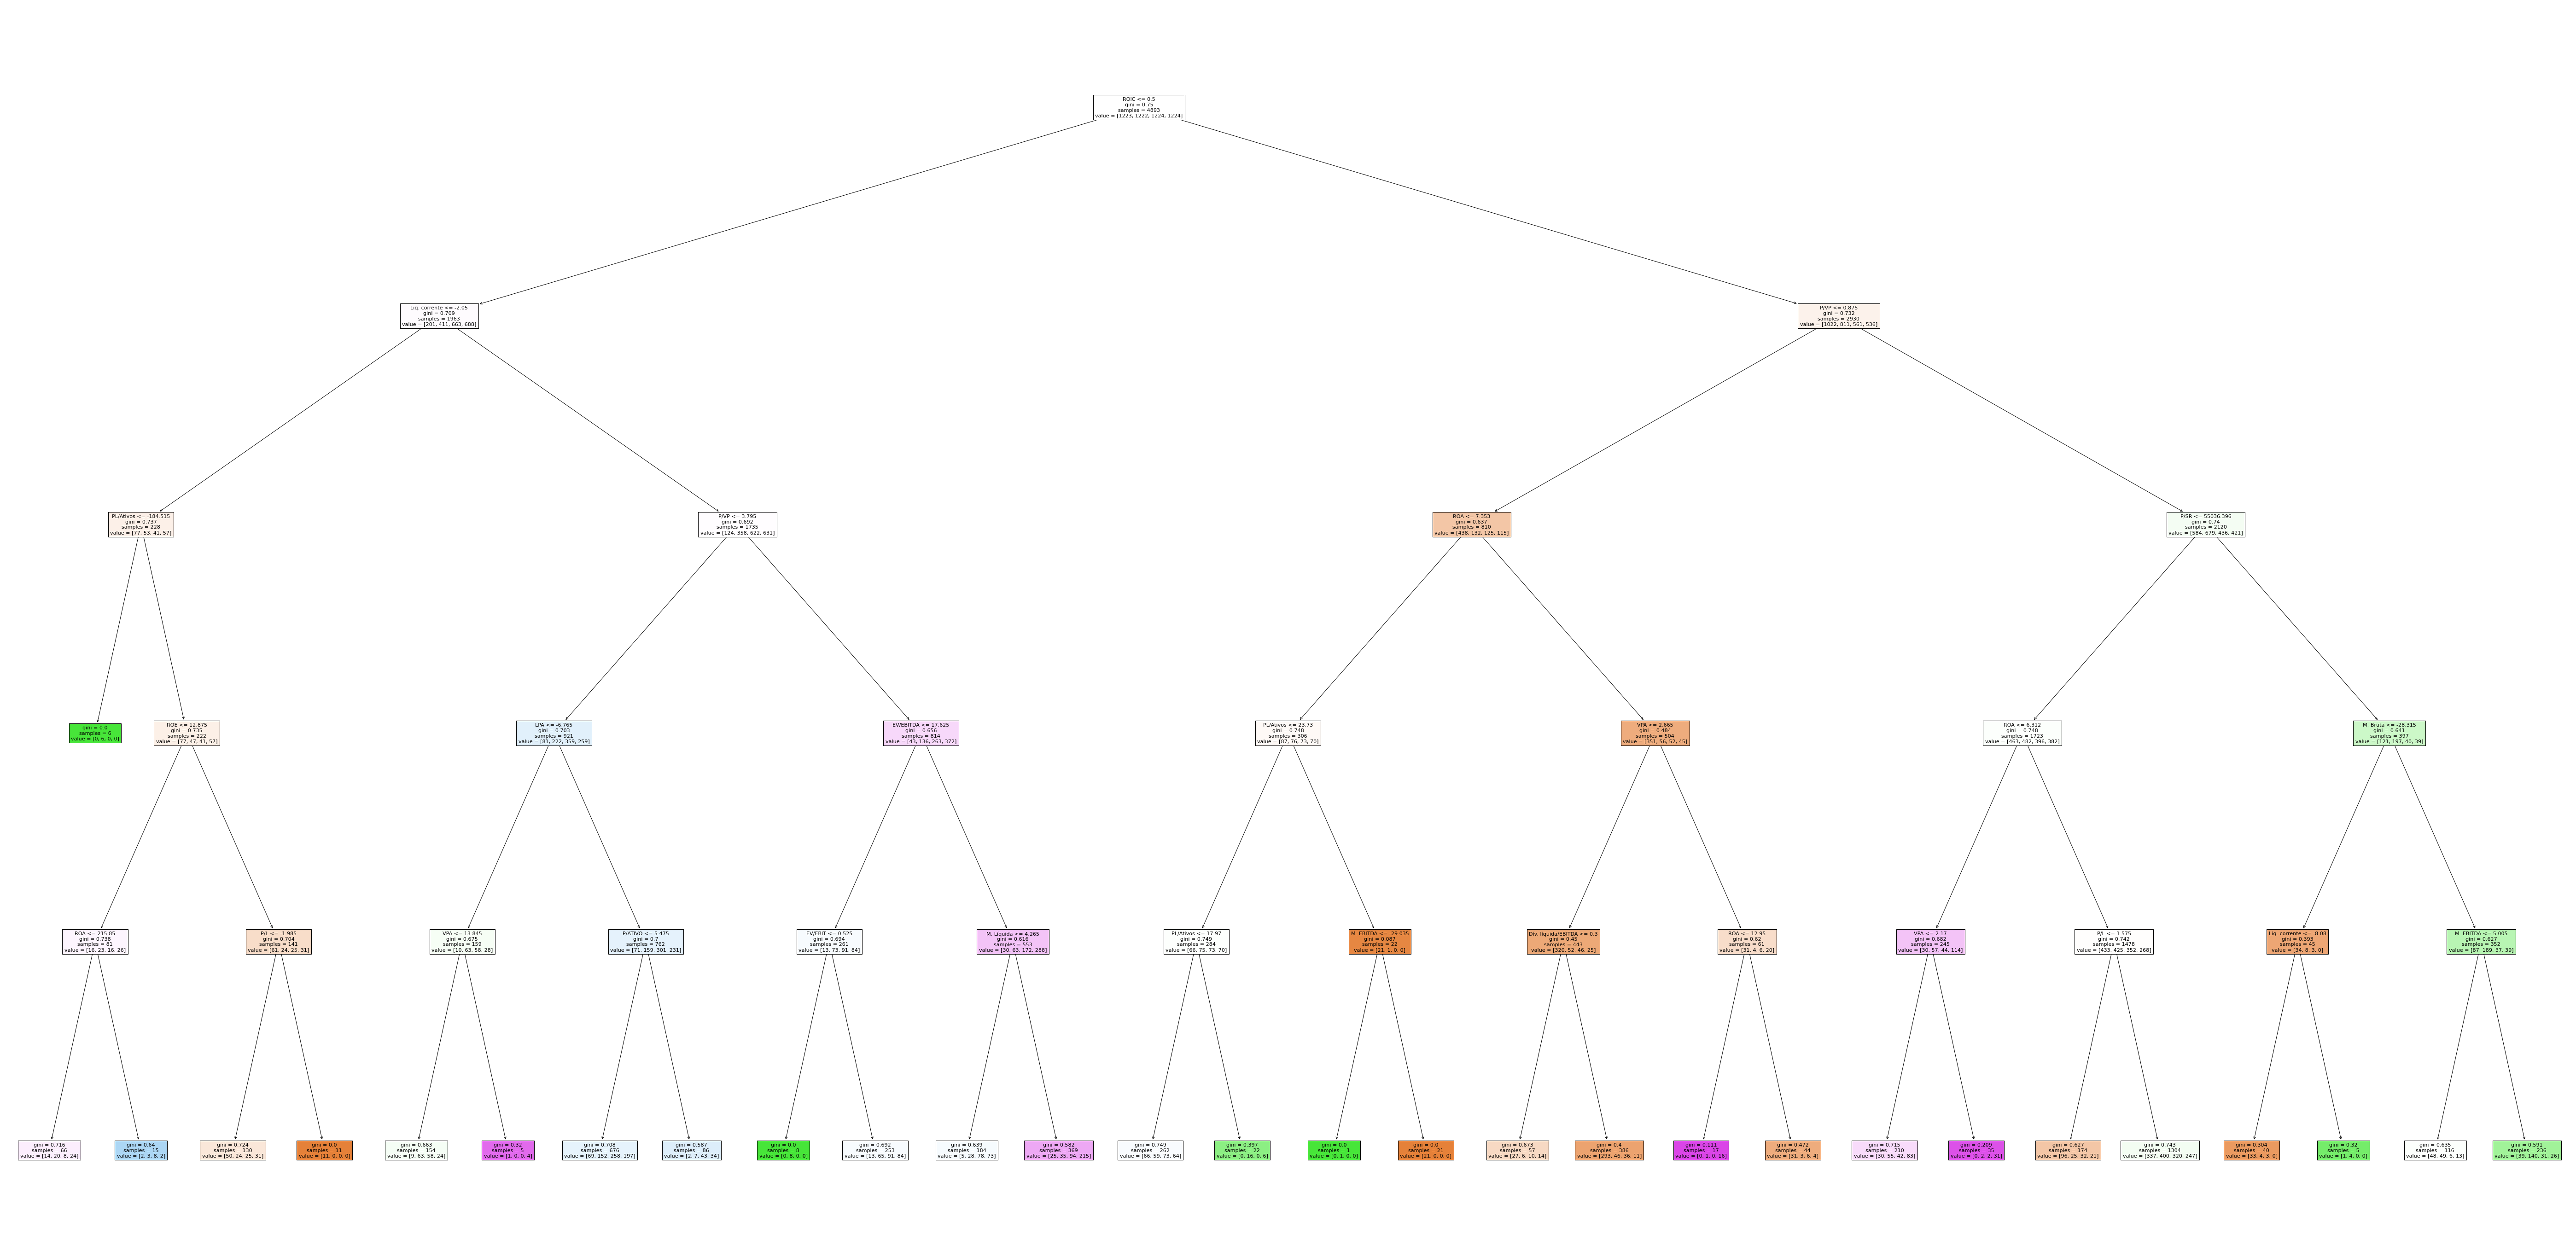

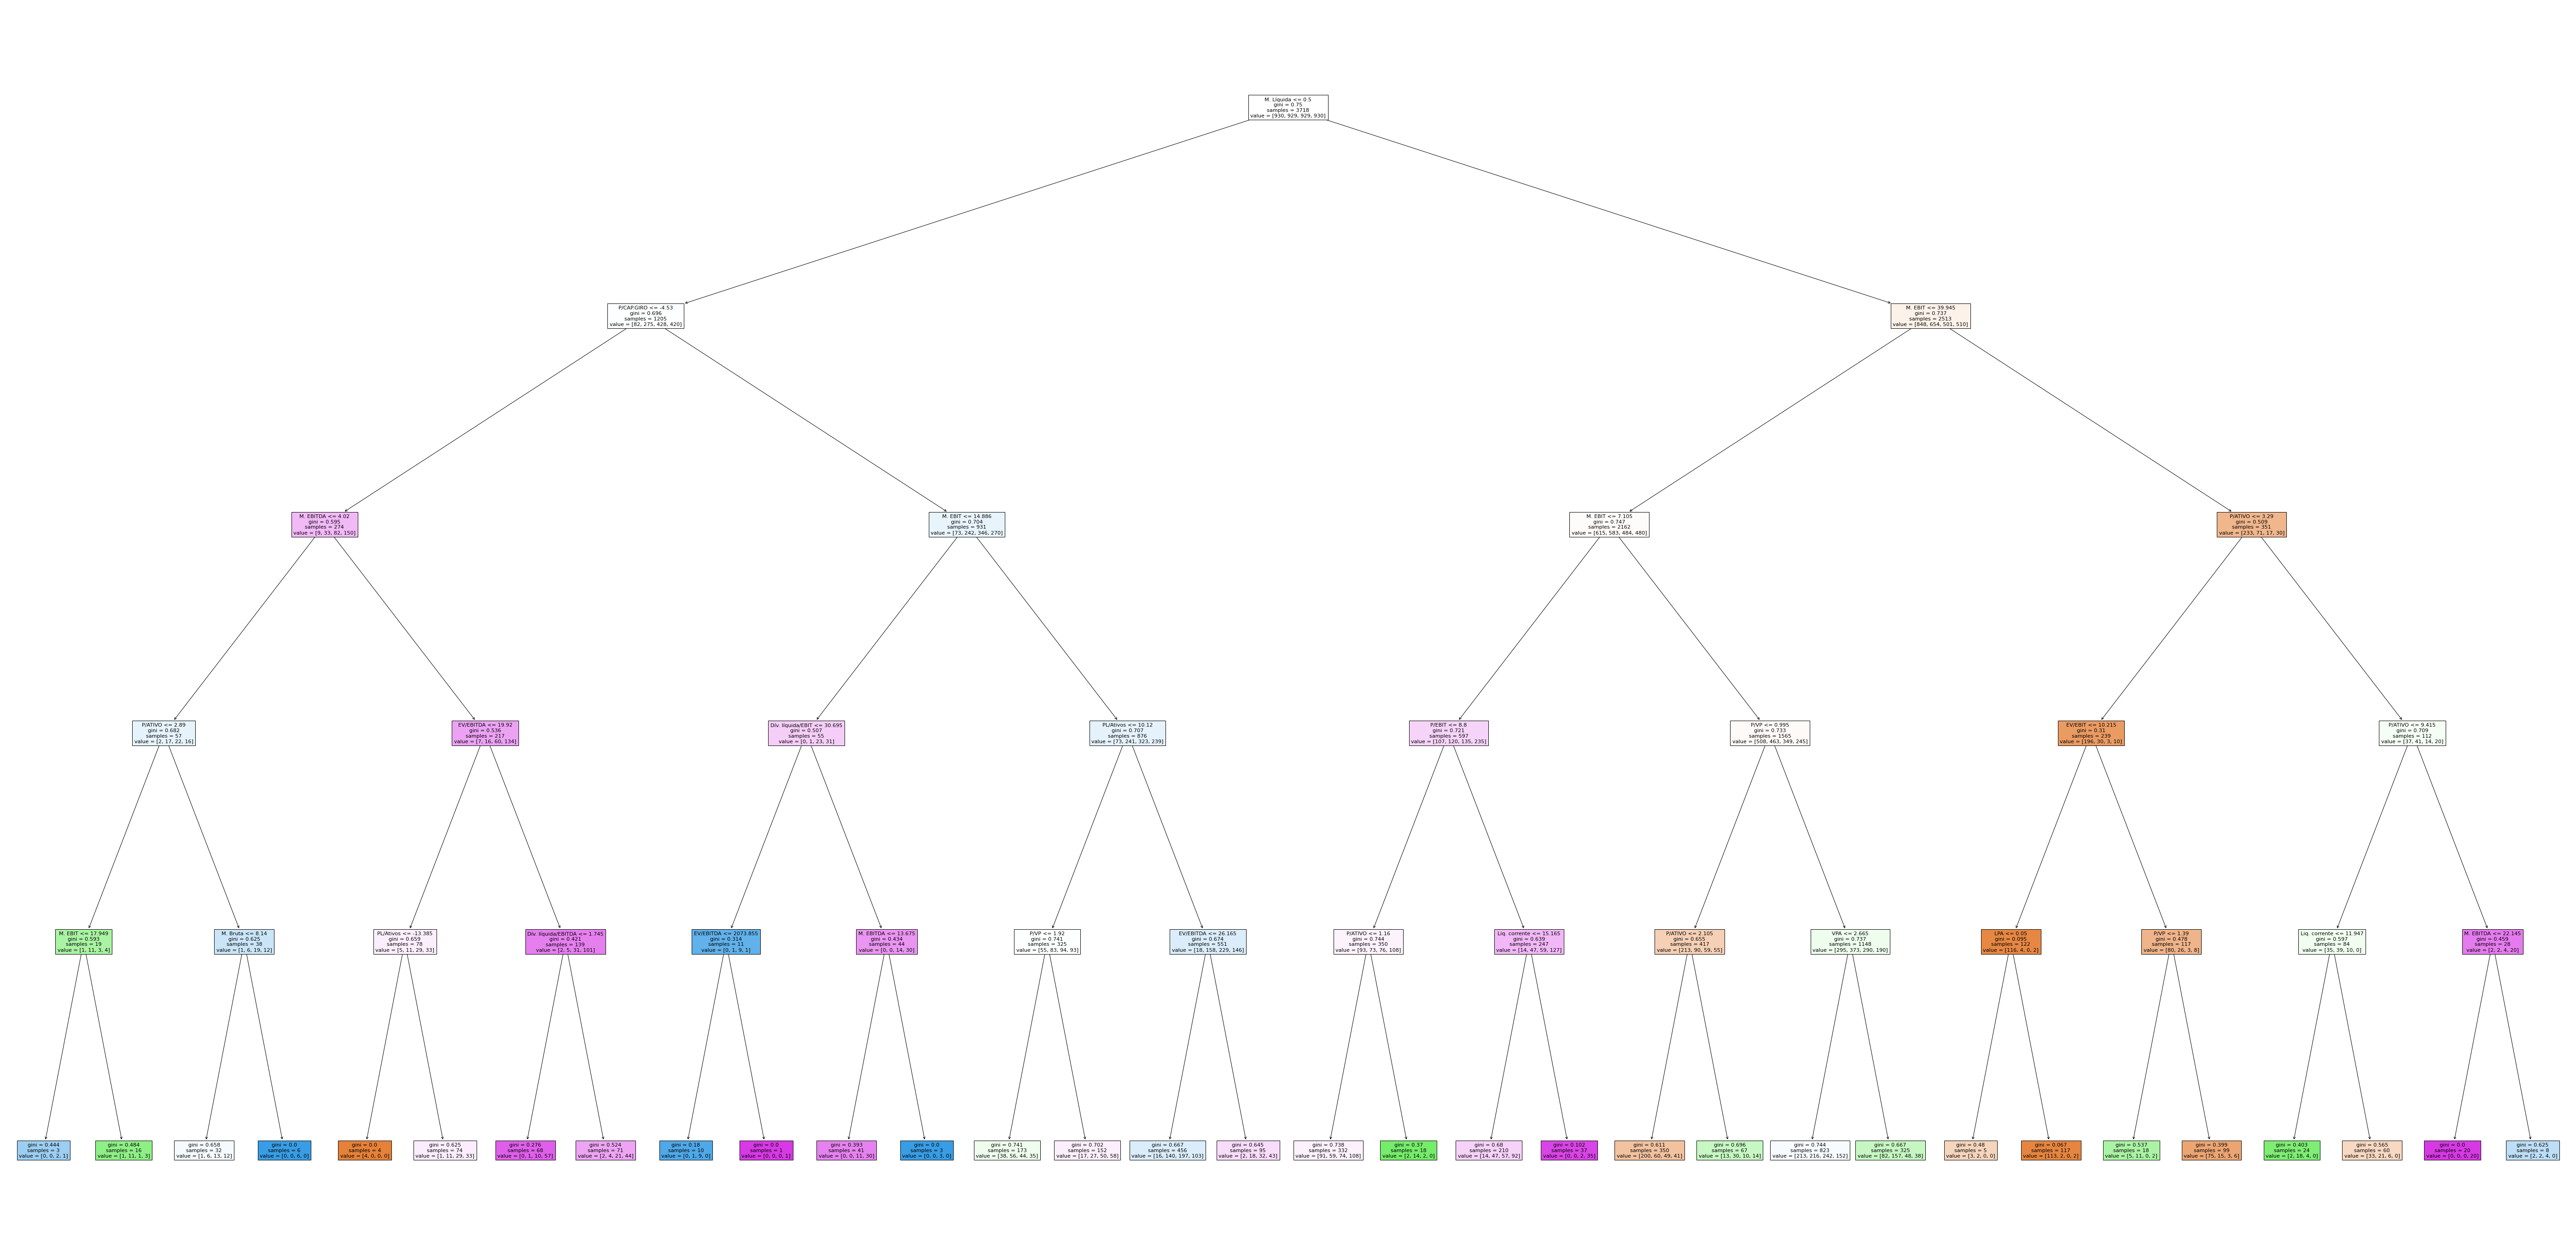

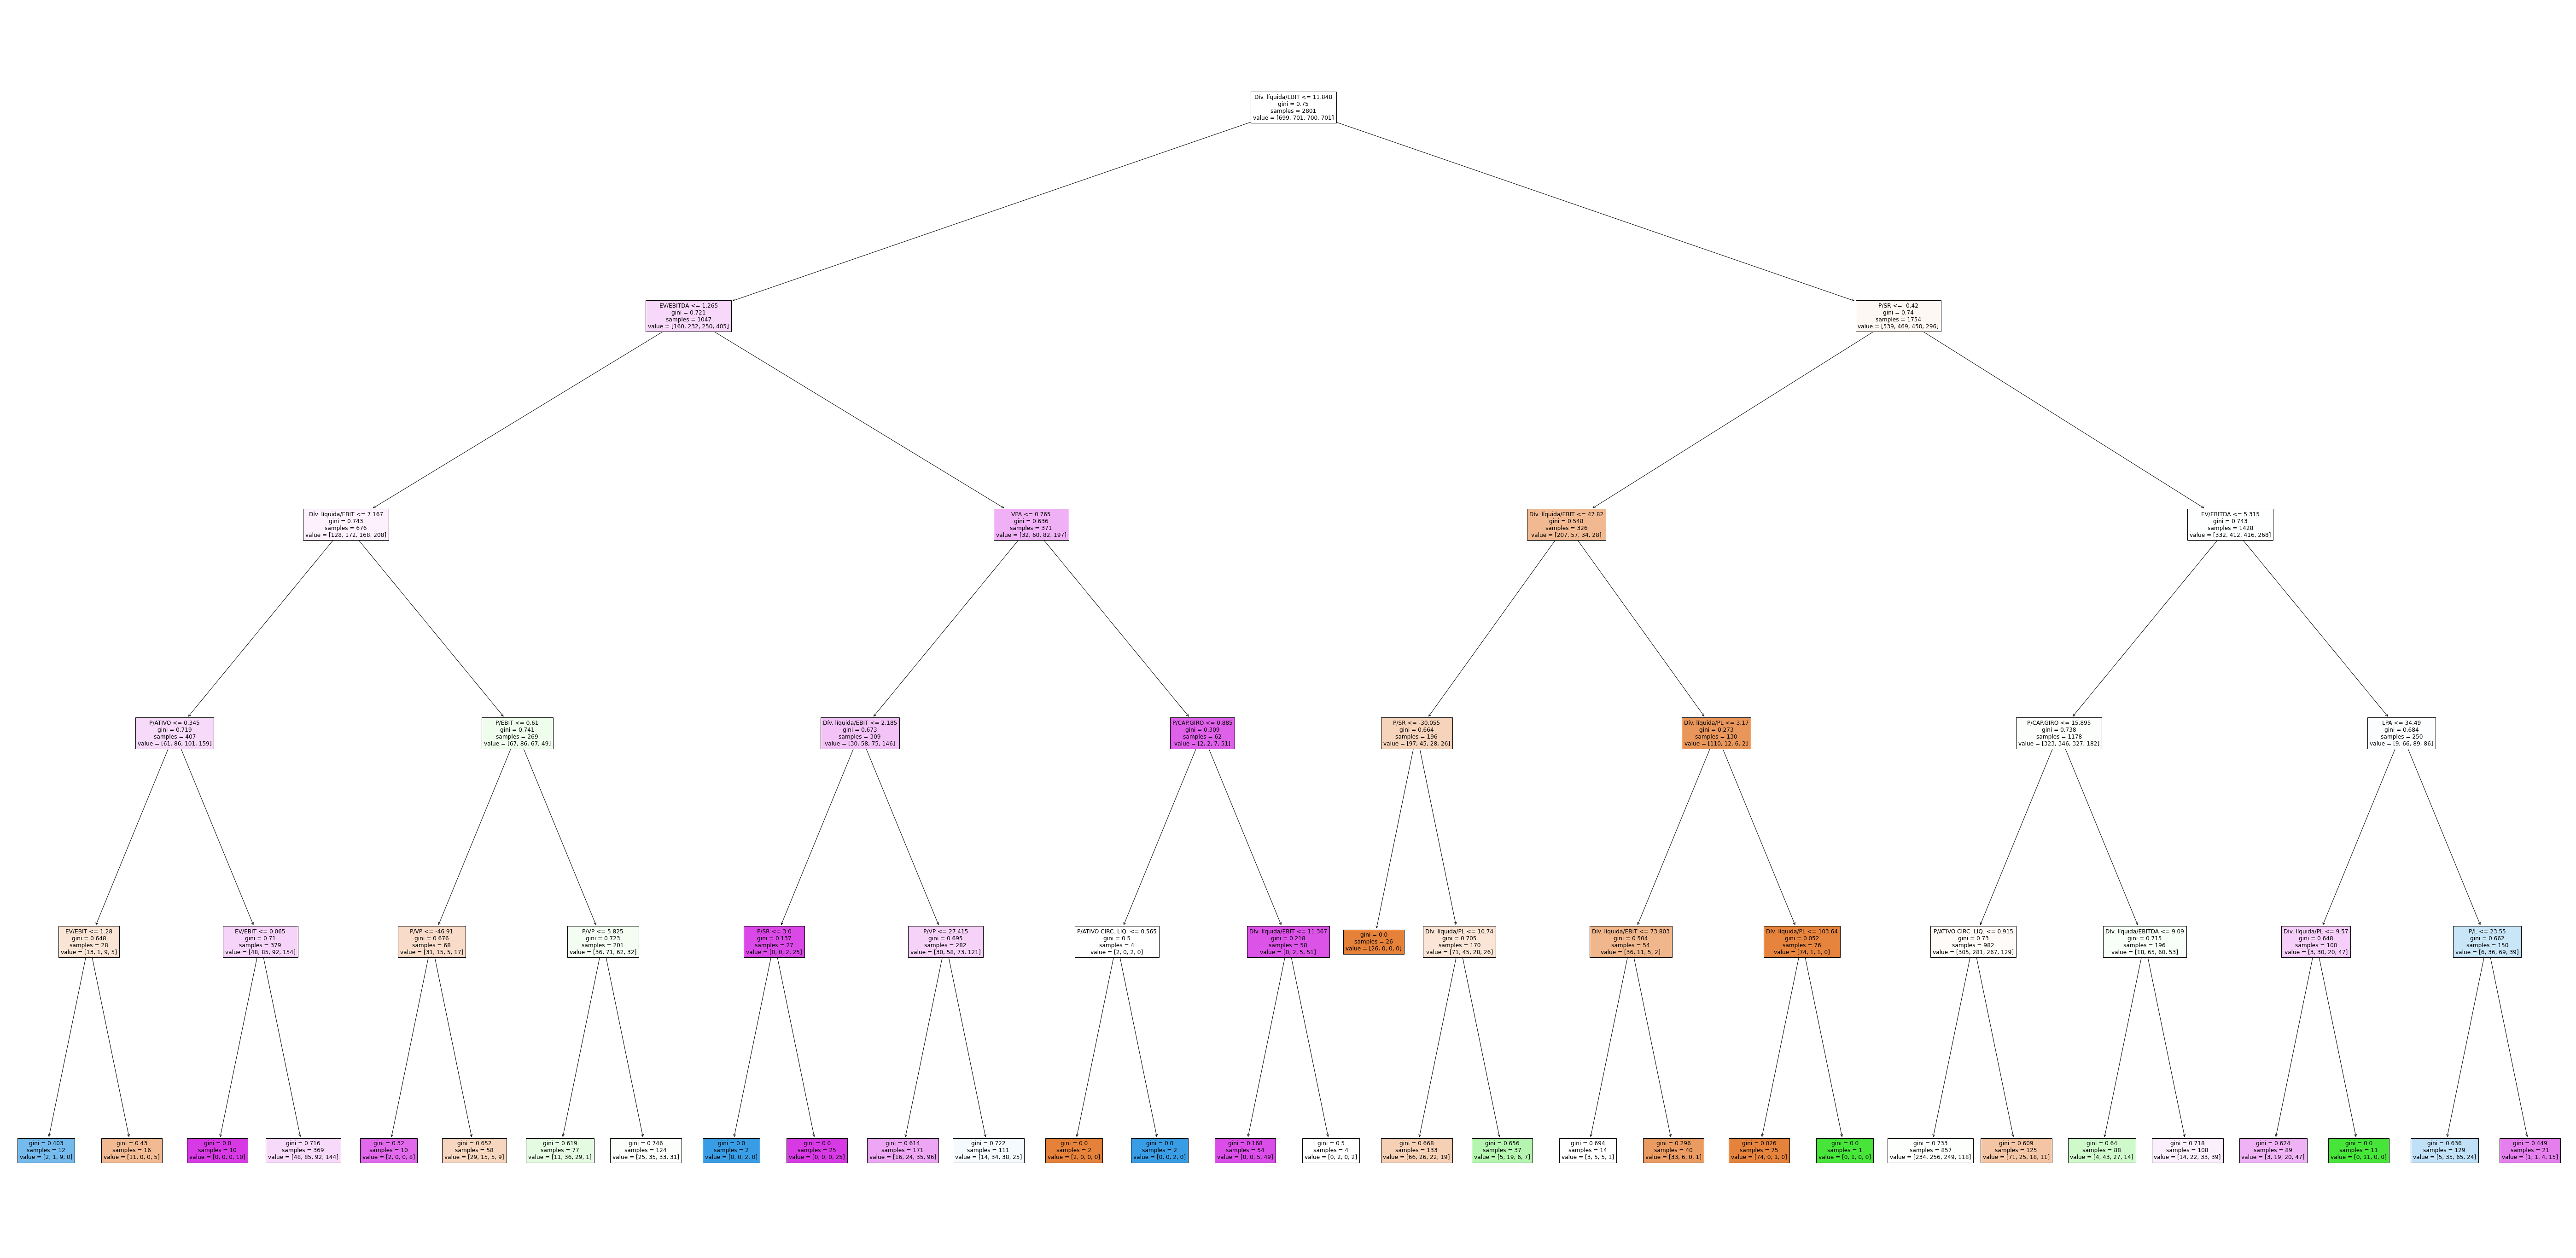

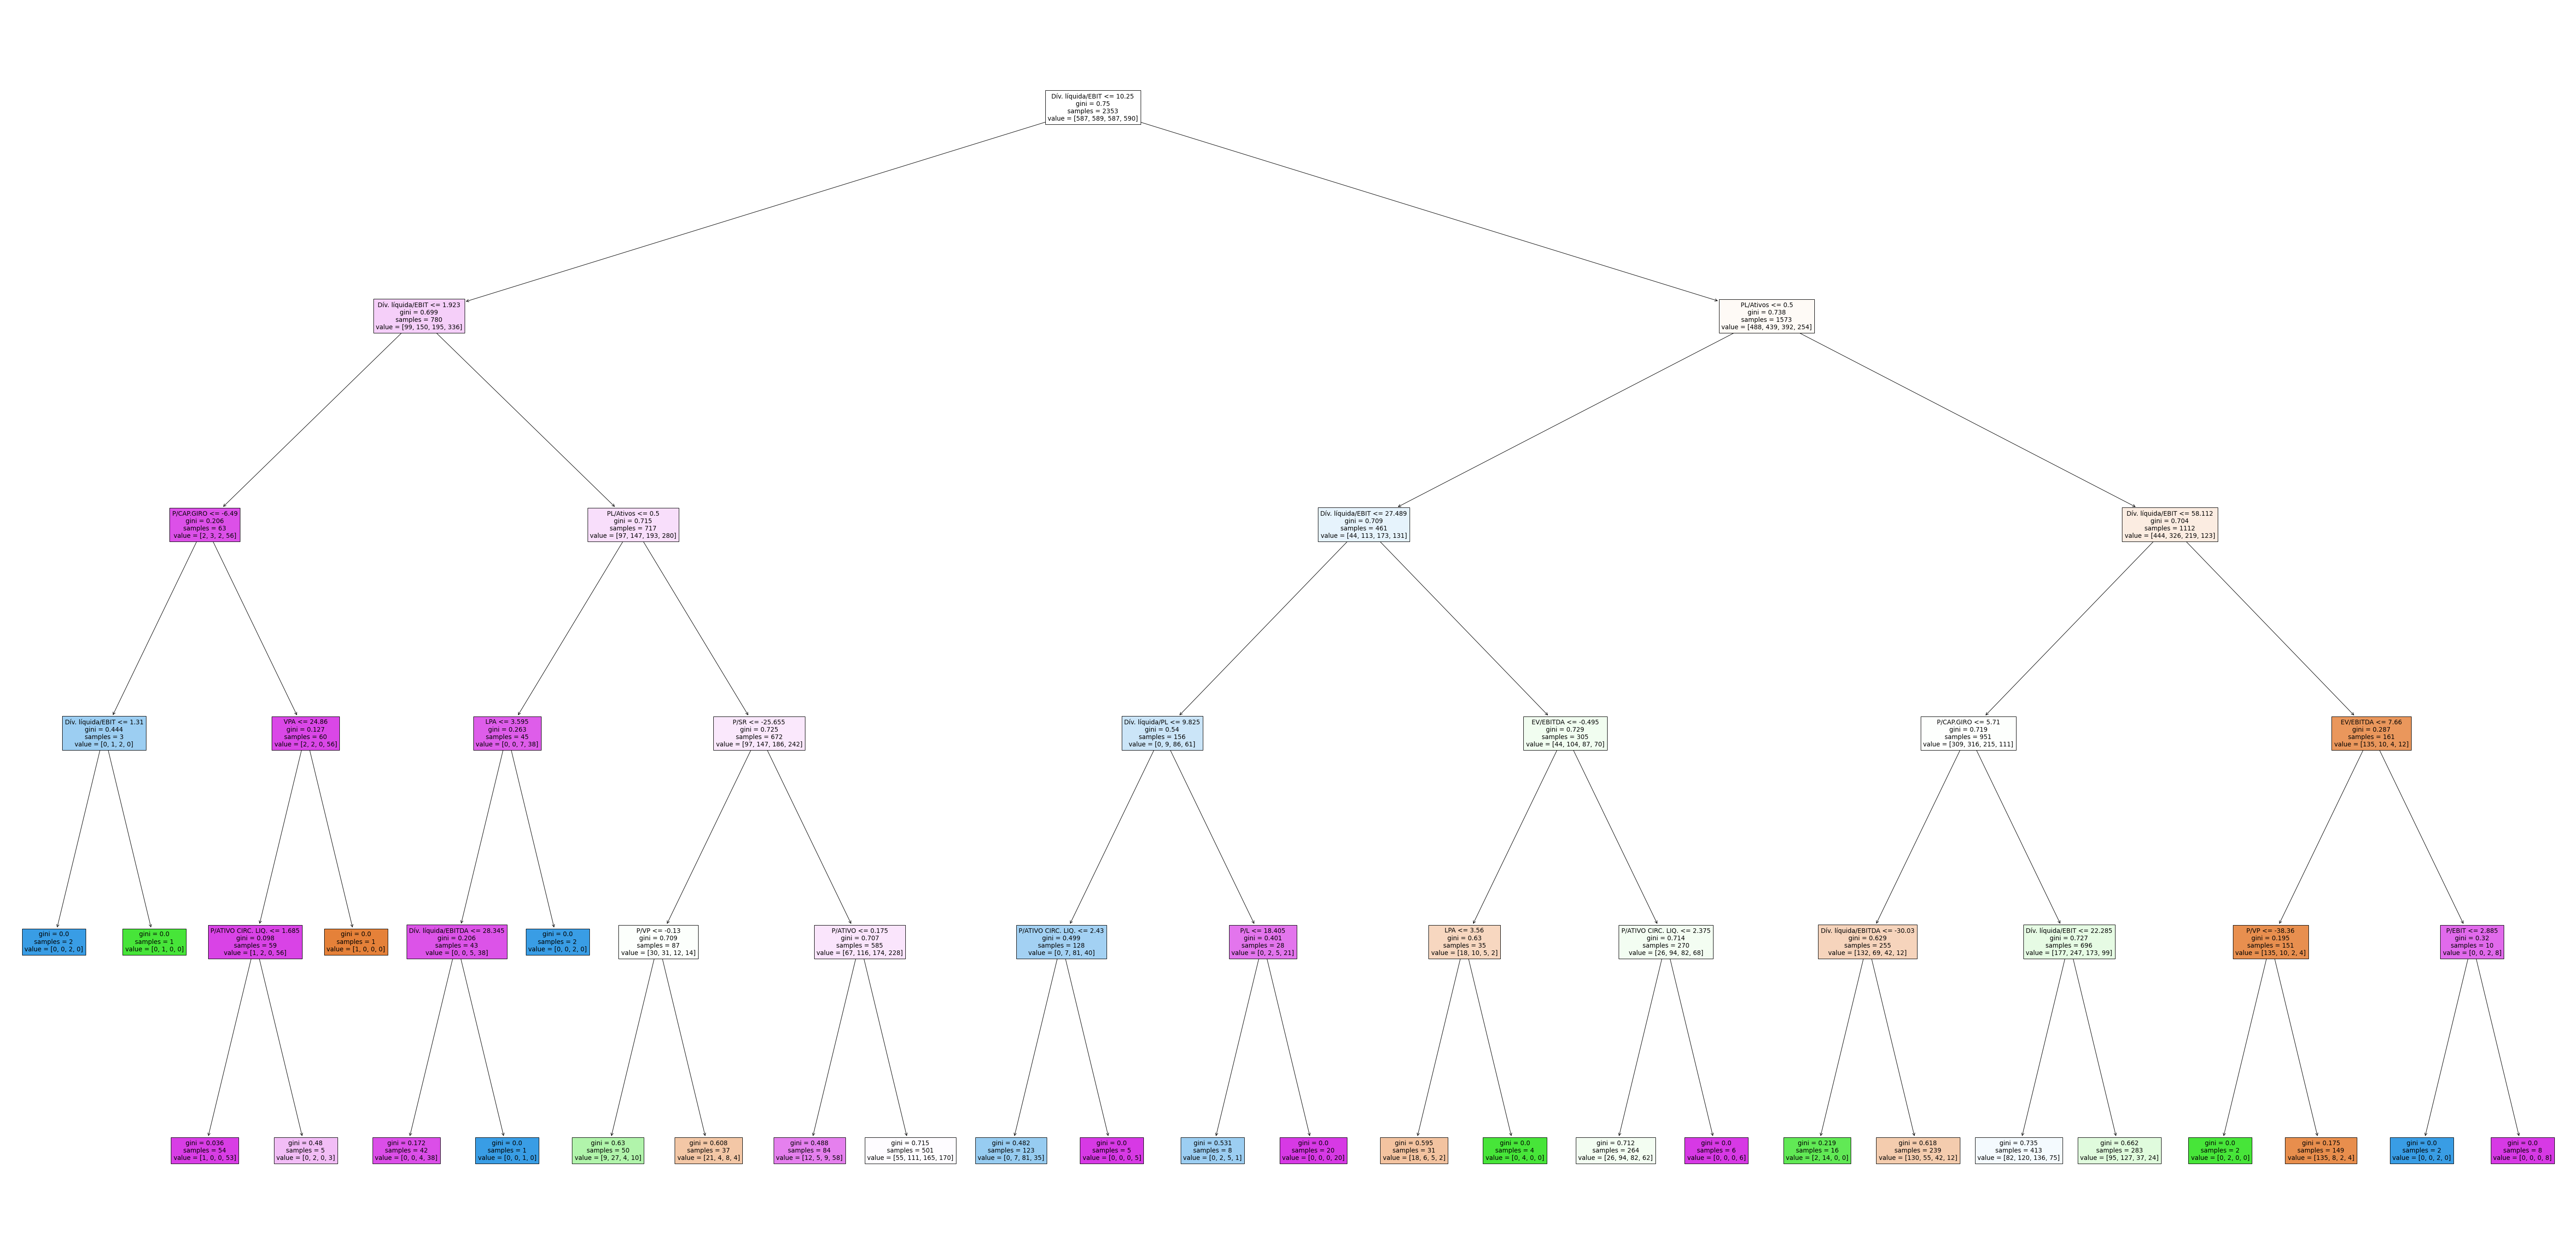

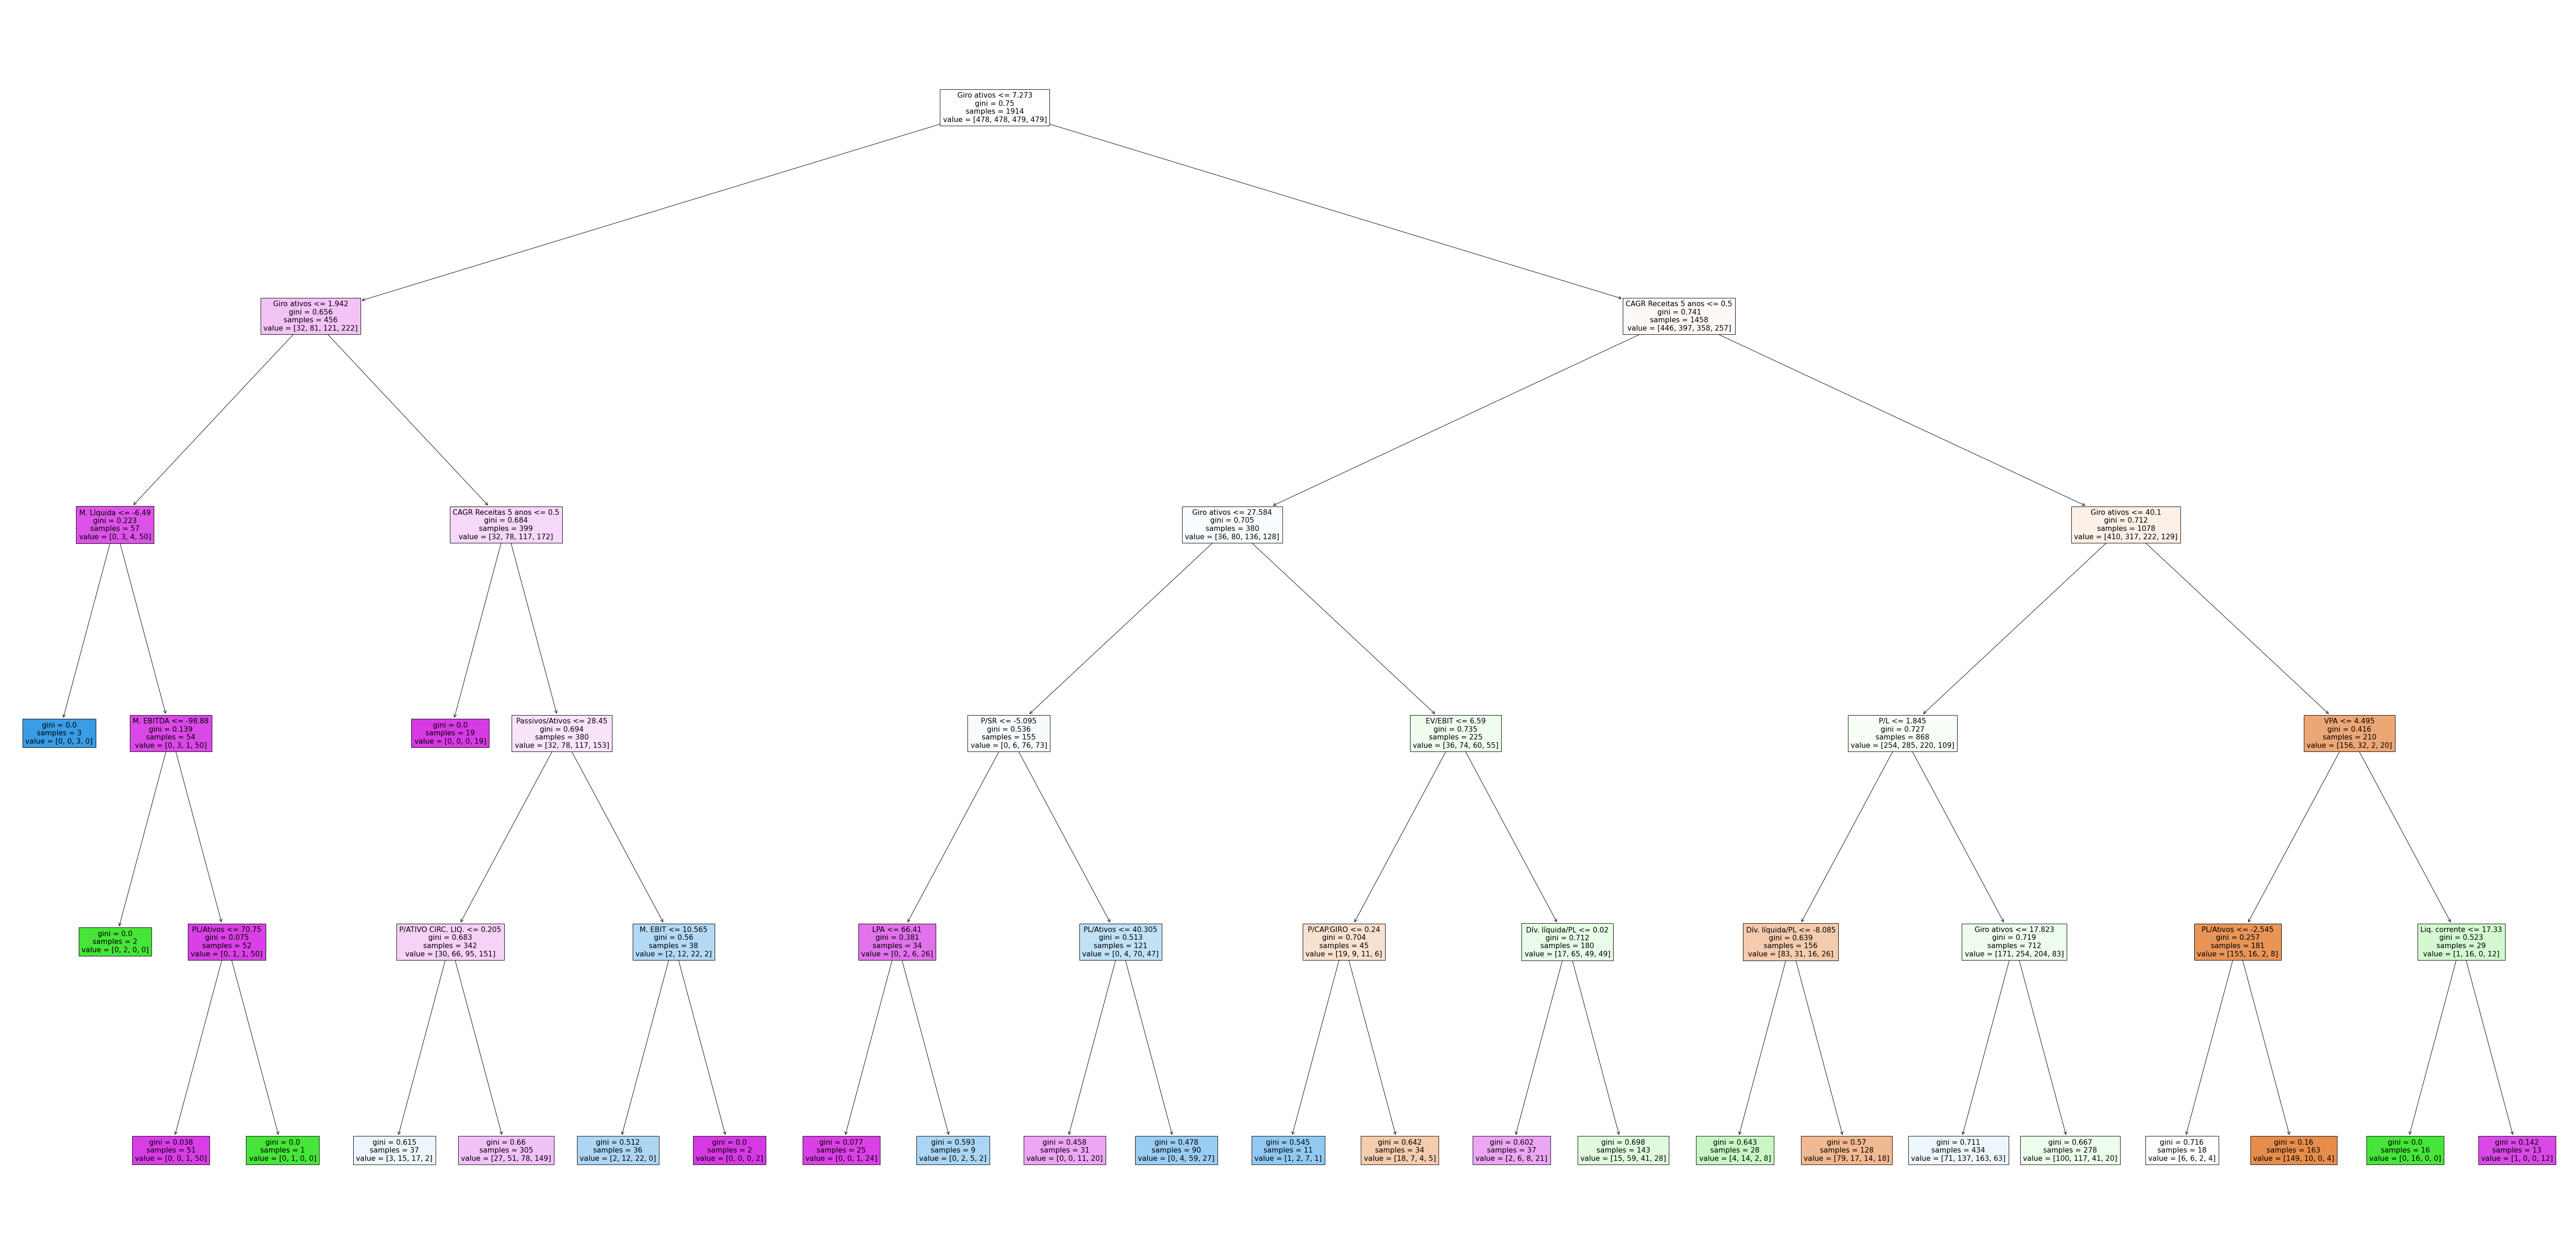

In [19]:
cv_result = []
reports = []
matrices = []
for i in range(1,6):
    x = dfs[i-1].drop('Open_dif_disc', axis=1)
    y = dfs[i-1]['Open_dif_disc']
    rfecv = RFECV(DecisionTreeClassifier(), min_features_to_select=5, cv=5)
    
    x_r = rfecv.fit_transform(x,y)
    
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(x_r,y)
    
    fig = plt.figure(figsize=(100,50))
    _ = plot_tree(tree, 
                       feature_names=x.columns,  
                       filled=True)
    plt.savefig("Trees\\tree_{}.jpeg".format(i), bbox_inches='tight')
    
    cv_result.append(cross_validate(RandomForestClassifier(), x, y, scoring='accuracy', cv=5))
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    tree = RandomForestClassifier()
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    
    reports.append(classification_report(y_test, y_pred))
    matrices.append(confusion_matrix(y_test, y_pred))

In [20]:
cv_result

[{'fit_time': array([1.25999904, 1.28898382, 1.24803853, 1.24701047, 1.35796165]),
  'score_time': array([0.03596449, 0.02900195, 0.02999973, 0.03198957, 0.04400253]),
  'test_score': array([0.67824311, 0.68335036, 0.67517875, 0.67382413, 0.66564417])},
 {'fit_time': array([0.91396165, 0.93400073, 0.90399814, 0.91603804, 0.90199947]),
  'score_time': array([0.02704906, 0.02999806, 0.02500153, 0.02496243, 0.02605319]),
  'test_score': array([0.70967742, 0.72177419, 0.69892473, 0.74427995, 0.73755047])},
 {'fit_time': array([0.68199801, 0.6660018 , 0.67899704, 0.67100334, 0.65497112]),
  'score_time': array([0.02103043, 0.02100277, 0.02100039, 0.02198792, 0.02302647]),
  'test_score': array([0.76114082, 0.77142857, 0.74821429, 0.80535714, 0.74285714])},
 {'fit_time': array([0.58894777, 0.57003117, 0.57199955, 0.57101798, 0.54502583]),
  'score_time': array([0.02000189, 0.01999855, 0.02000165, 0.01998234, 0.01899981]),
  'test_score': array([0.7940552 , 0.78343949, 0.76433121, 0.80851064,

In [21]:
i = 1
for report in reports:
    print("YEAR {}".format(i))
    print(report)
    i+=1

YEAR 1
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       384
         1.0       0.64      0.58      0.61       365
         2.0       0.53      0.65      0.58       347
         3.0       0.63      0.60      0.61       372

    accuracy                           0.64      1468
   macro avg       0.65      0.64      0.64      1468
weighted avg       0.65      0.64      0.64      1468

YEAR 2
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       288
         1.0       0.68      0.65      0.66       266
         2.0       0.62      0.66      0.64       286
         3.0       0.72      0.69      0.71       276

    accuracy                           0.71      1116
   macro avg       0.71      0.71      0.71      1116
weighted avg       0.71      0.71      0.71      1116

YEAR 3
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       209


In [22]:
i = 1
for matrix in matrices:
    print("YEAR {}".format(i))
    print("0 | {}".format(matrix[0]))
    print("1 | {}".format(matrix[1]))
    print("2 | {}".format(matrix[2]))
    print("3 | {}\n".format(matrix[3]))
    i+=1

YEAR 1
0 | [284  42  29  29]
1 | [ 36 212  79  38]
2 | [ 18  42 224  63]
3 | [ 27  34  89 222]

YEAR 2
0 | [242  28  12   6]
1 | [ 22 172  48  24]
2 | [ 19  34 190  43]
3 | [ 11  18  57 190]

YEAR 3
0 | [163  29   8   9]
1 | [ 16 158  26  12]
2 | [  6  29 154  28]
3 | [  9   9  34 151]

YEAR 4
0 | [146  19  10   6]
1 | [ 20 132  25   7]
2 | [  2  19 120  22]
3 | [  2   7  32 137]

YEAR 5
0 | [117  23   5   2]
1 | [ 13 106  19  11]
2 | [  5  17 104  21]
3 | [  3   5  17 107]

